# **Name: Sudharshan PS**
# *Course: Data Analytics and Visualization*
# *Roll no.: 3122225002138*
# ***Sec: IT-C***

In [4]:
#Importing required libraries

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
#Loading the dataset - Wholesale customers data
adf = pd.read_csv("adult.csv")
adf.head()

FileNotFoundError: [Errno 2] No such file or directory: 'adult.csv'

In [8]:
print("Number of columns:",len(adf.columns))
print("Number of rows:",len(adf))
print("Shape of the Customer dataframe:",adf.shape)

Number of columns: 15
Number of rows: 48842
Shape of the Customer dataframe: (48842, 15)


In [9]:
#Number of missing values

adf.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**The adult data has no missing values in any of its features**.

So, no modification is required in the adult dataframe(Data Imputation or any other operation)

In [10]:
#Handling outliers

from scipy import stats
z_scores = np.abs(stats.zscore(adf.select_dtypes(include=[np.number])))
z_scores

age    fnlwgt  educational-num  capital-gain  capital-loss  \
0      0.995129  0.351675         1.197259      0.144804      0.217127   
1      0.046942  0.945524         0.419335      0.144804      0.217127   
2      0.776316  1.394723         0.747550      0.144804      0.217127   
3      0.390683  0.277844         0.030373      0.886874      0.217127   
4      1.505691  0.815954         0.030373      0.144804      0.217127   
...         ...       ...              ...           ...           ...   
48837  0.849254  0.640492         0.747550      0.144804      0.217127   
48838  0.098933  0.334178         0.419335      0.144804      0.217127   
48839  1.411808  0.357510         0.419335      0.144804      0.217127   
48840  1.213941  0.111984         0.419335      0.144804      0.217127   
48841  0.974183  0.930494         0.419335      1.871315      0.217127   

       hours-per-week  
0            0.034087  
1            0.772930  
2            0.034087  
3            0.034087  
4            0.841104  
...               ...  
48837        0.195490  
48838        0.034087  
48839        0.034087  
48840        1.648120  
48841        0.034087  

[48842 rows x 6 columns]

In [11]:
#Initial shape of the dataframe

adf.shape

(48842, 15)

In [12]:
custdf = adf[(z_scores<3).all(axis=1)]

#After dropping the outliers

custdf.shape

(44717, 15)

**4125 rows have contained outliers** and have been dropped by their z-score and the dataframe is modified.

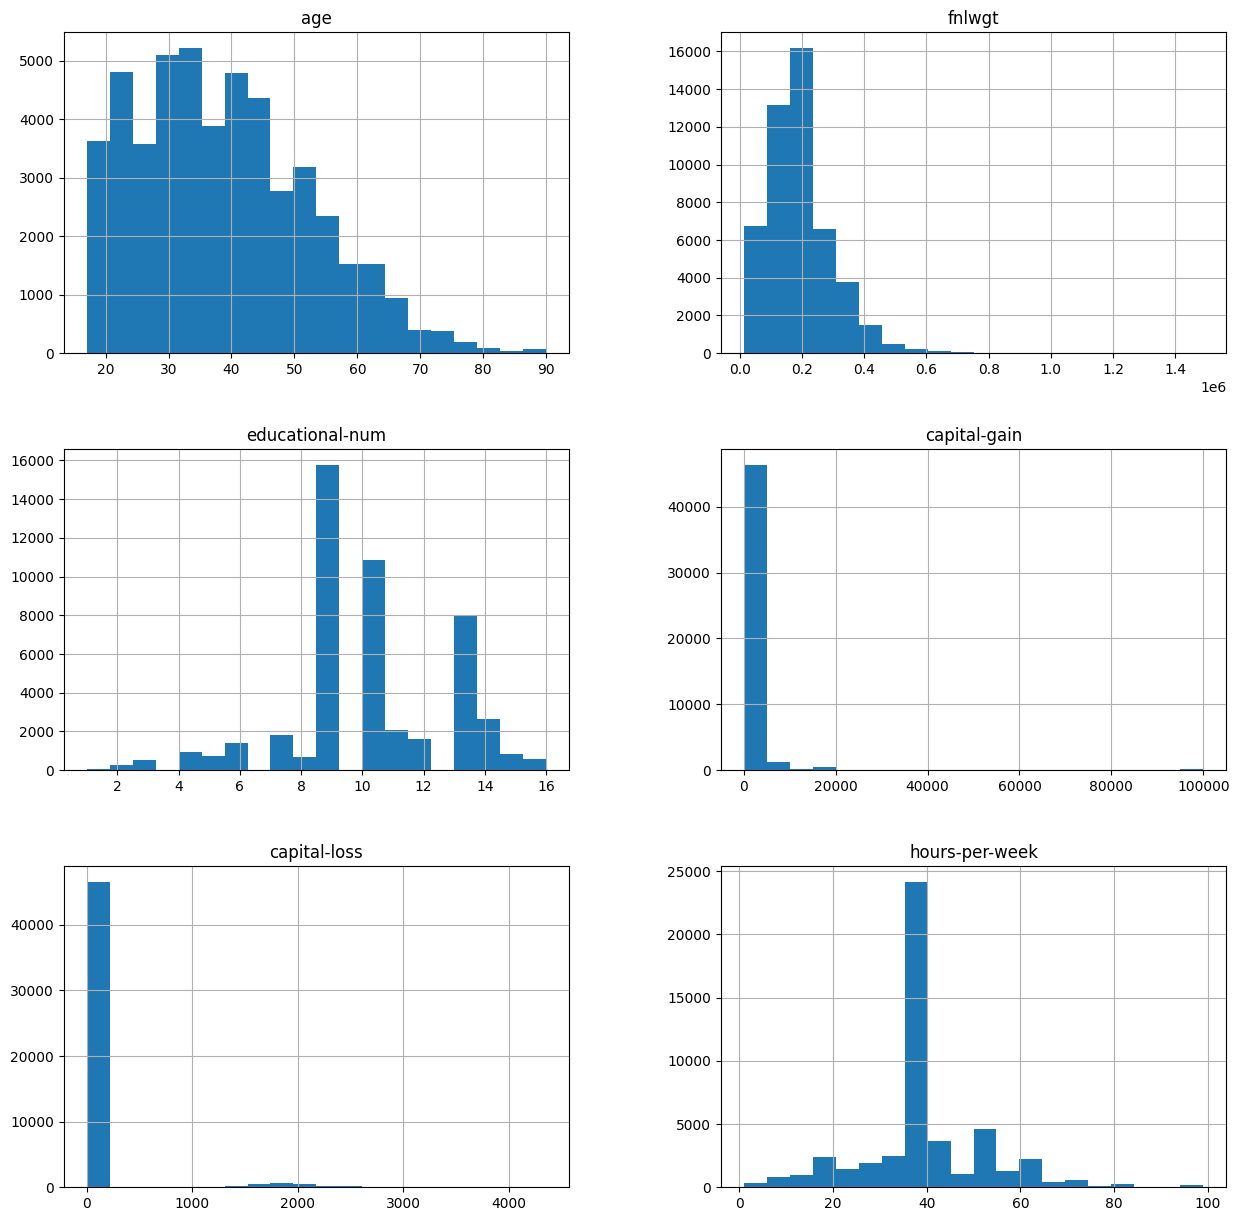

In [13]:
adf.hist(bins=20, figsize=(15,15))
plt.show()

**The dataset is not normalized and that can be inferred from the histogram plots**.

So, the dataset is not normalized.

In [17]:
#Normalizing the dataset

# 1) Min-Max Normalization
def min_max_normalize(data):
    return (data - data.min()) / (data.max() - data.min())

adf_numerical_cols = adf.select_dtypes(include=[np.number])

# Apply Min-Max normalization only to numerical columns only*
adf_normalized_numerical = adf_numerical_cols.apply(min_max_normalize)

# Combine normalized numerical columns with non-numerical columns
adf_normalized_1 = adf.copy()
adf_normalized_1[adf_numerical_cols.columns] = adf_normalized_numerical
adf_normalized_1

age     workclass    fnlwgt     education  educational-num  \
0      0.109589       Private  0.145129          11th         0.400000   
1      0.287671       Private  0.052451       HS-grad         0.533333   
2      0.150685     Local-gov  0.219649    Assoc-acdm         0.733333   
3      0.369863       Private  0.100153  Some-college         0.600000   
4      0.013699             ?  0.061708  Some-college         0.600000   
...         ...           ...       ...           ...              ...   
48837  0.136986       Private  0.165763    Assoc-acdm         0.733333   
48838  0.315068       Private  0.096129       HS-grad         0.533333   
48839  0.561644       Private  0.094462       HS-grad         0.533333   
48840  0.068493       Private  0.128004       HS-grad         0.533333   
48841  0.479452  Self-emp-inc  0.186482       HS-grad         0.533333   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0          0.000000           0.0        0.397959  United-States  <=50K  
1          0.000000           0.0        0.500000  United-States  <=50K  
2          0.000000           0.0        0.397959  United-States   >50K  
3          0.076881           0.0        0.397959  United-States   >50K  
4          0.000000           0.0        0.295918  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837      0.000000           0.0        0.377551  United-States  <=50K  
48838      0.000000           0.0        0.397959  United-States   >50K  
48839      0.000000           0.0        0.397959  United-States  <=50K  
48840      0.000000           0.0        0.193878  United-States  <=50K  
48841      0.150242           0.0        0.397959  United-States   >50K  

[48842 rows x 15 columns]

In [18]:
# 2) Z-score Normalization
def zscore_normalize(data):
    return (data - data.mean()) / data.std()

adf_numerical_cols = adf.select_dtypes(include=[np.number])

# Apply Z-score normalization only to numerical columns only*
adf_normalized_numerical = adf_numerical_cols.apply(zscore_normalize)

# Combine normalized numerical columns with non-numerical columns
adf_normalized_2 = adf.copy()
adf_normalized_2[adf_numerical_cols.columns] = adf_normalized_numerical
adf_normalized_2

age     workclass    fnlwgt     education  educational-num  \
0     -0.995119       Private  0.351671          11th        -1.197247   
1     -0.046941       Private -0.945514       HS-grad        -0.419331   
2     -0.776309     Local-gov  1.394709    Assoc-acdm         0.747543   
3      0.390679       Private -0.277841  Some-college        -0.030373   
4     -1.505676             ? -0.815946  Some-college        -0.030373   
...         ...           ...       ...           ...              ...   
48837 -0.849245       Private  0.640486    Assoc-acdm         0.747543   
48838  0.098932       Private -0.334174       HS-grad        -0.419331   
48839  1.411794       Private -0.357507       HS-grad        -0.419331   
48840 -1.213929       Private  0.111983       HS-grad        -0.419331   
48841  0.974173  Self-emp-inc  0.930484       HS-grad        -0.419331   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0         -0.144802     -0.217125       -0.034087  United-States  <=50K  
1         -0.144802     -0.217125        0.772922  United-States  <=50K  
2         -0.144802     -0.217125       -0.034087  United-States   >50K  
3          0.886865     -0.217125       -0.034087  United-States   >50K  
4         -0.144802     -0.217125       -0.841095  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837     -0.144802     -0.217125       -0.195488  United-States  <=50K  
48838     -0.144802     -0.217125       -0.034087  United-States   >50K  
48839     -0.144802     -0.217125       -0.034087  United-States  <=50K  
48840     -0.144802     -0.217125       -1.648104  United-States  <=50K  
48841      1.871296     -0.217125       -0.034087  United-States   >50K  

[48842 rows x 15 columns]

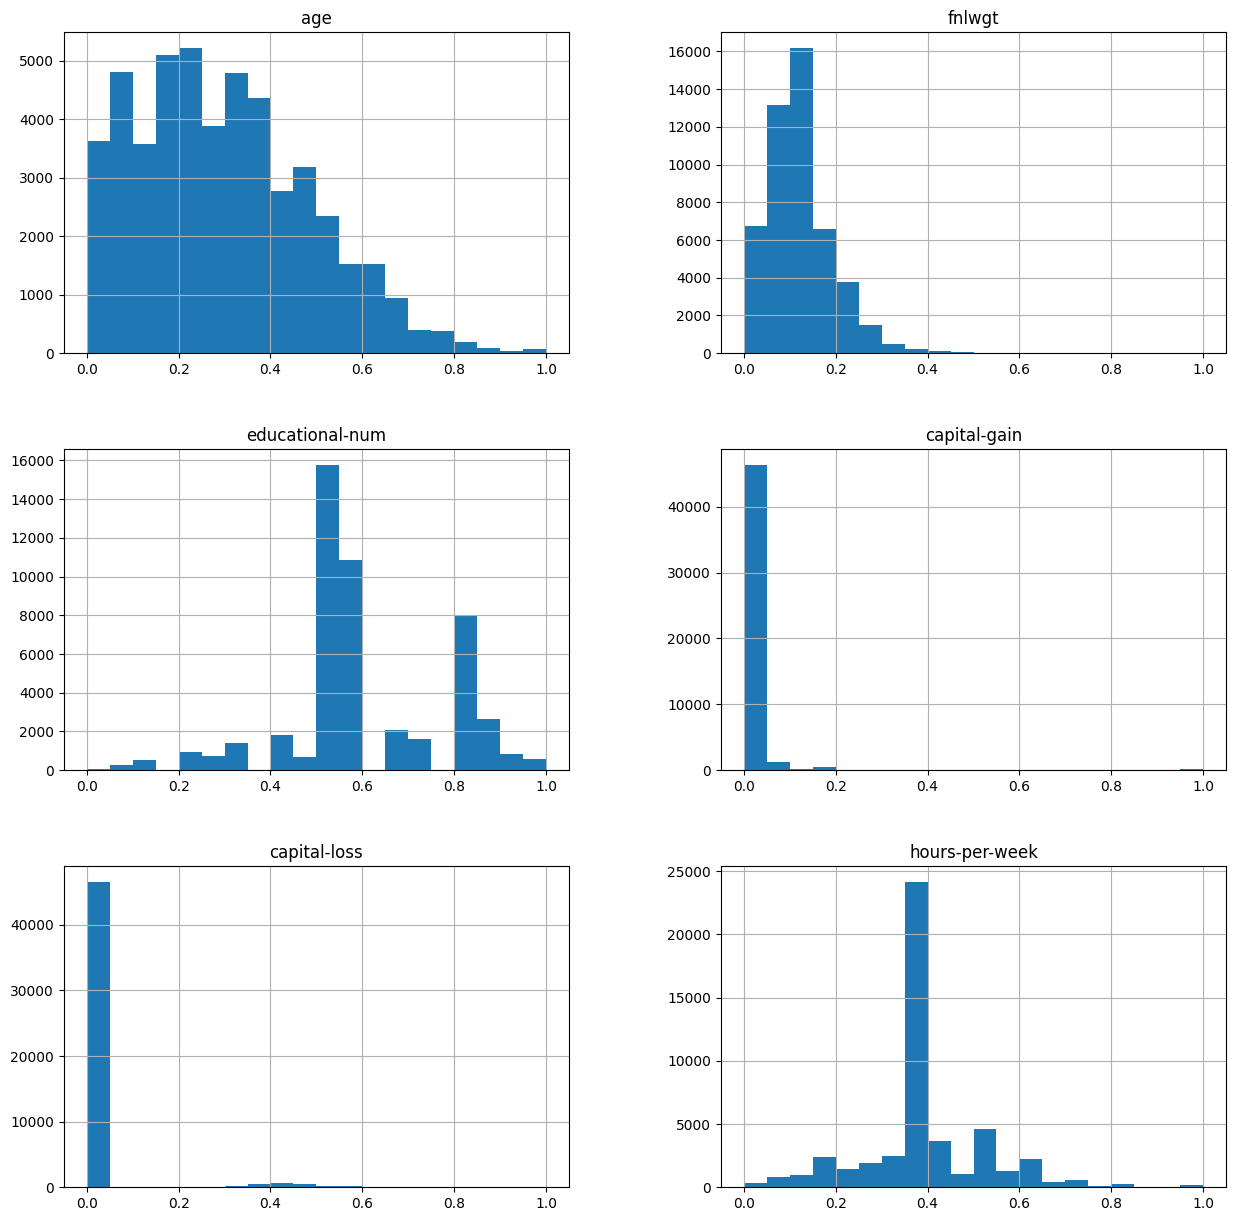

In [19]:
#Histogram of the Min Max normalized dataframe

adf_normalized_1.hist(bins=20, figsize=(15,15))
plt.show()

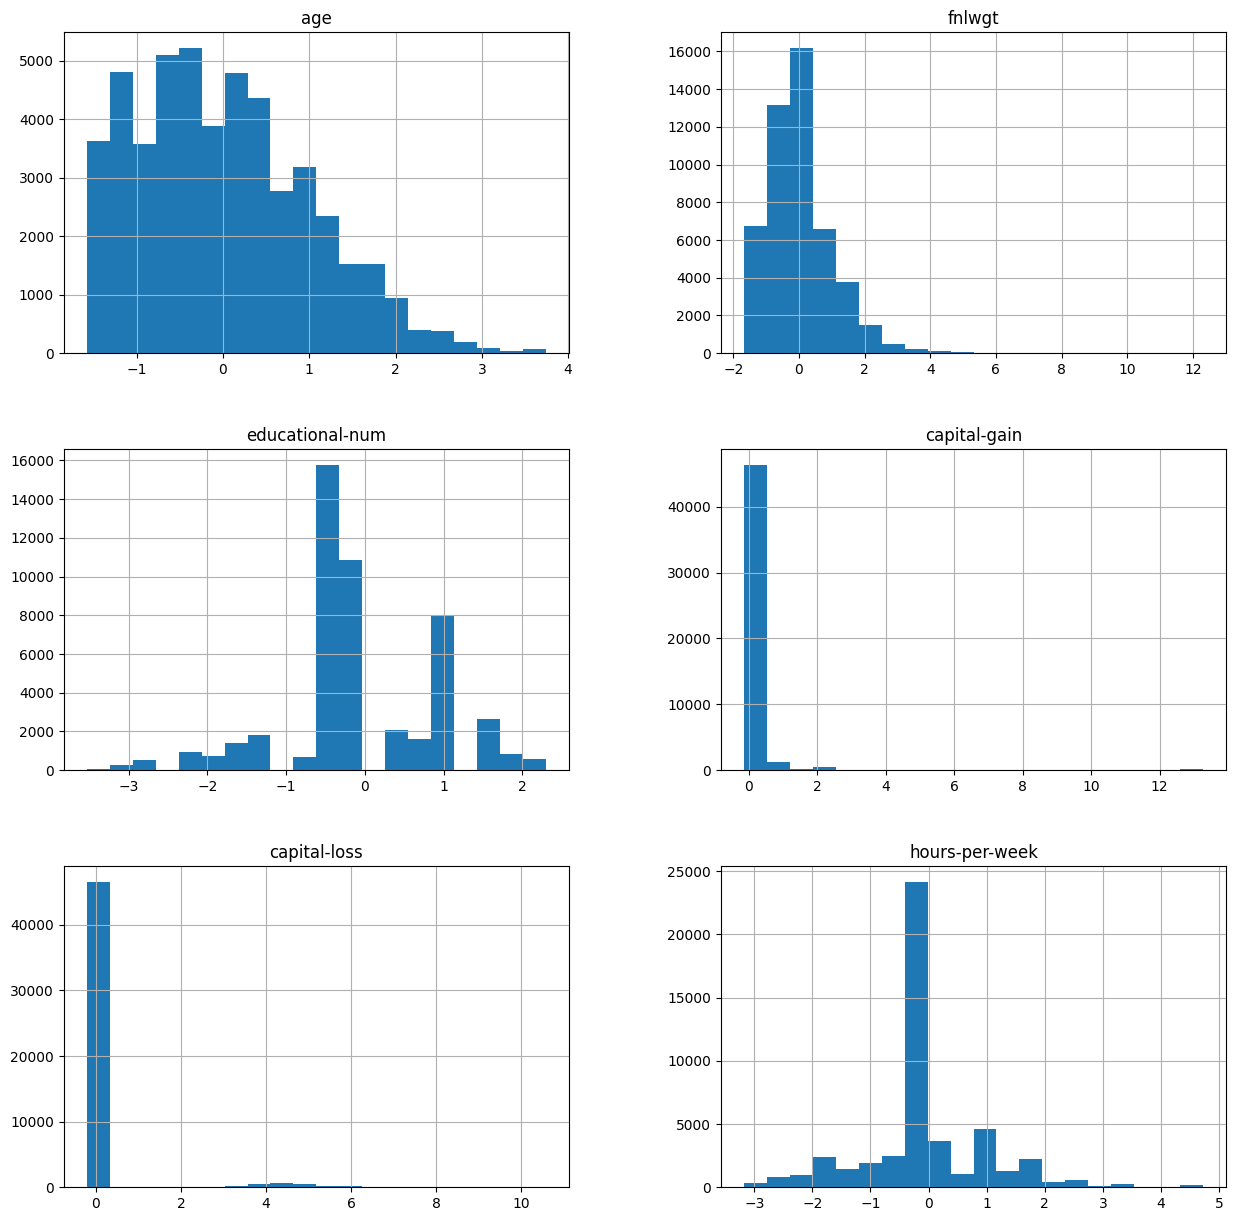

In [20]:
#Histogram of z-score normalization

adf_normalized_2.hist(bins=20, figsize=(15,15))
plt.show()

**The data of every feature is compressed to the range of [0,1]**.

Thus the whole dataframe is normalized.

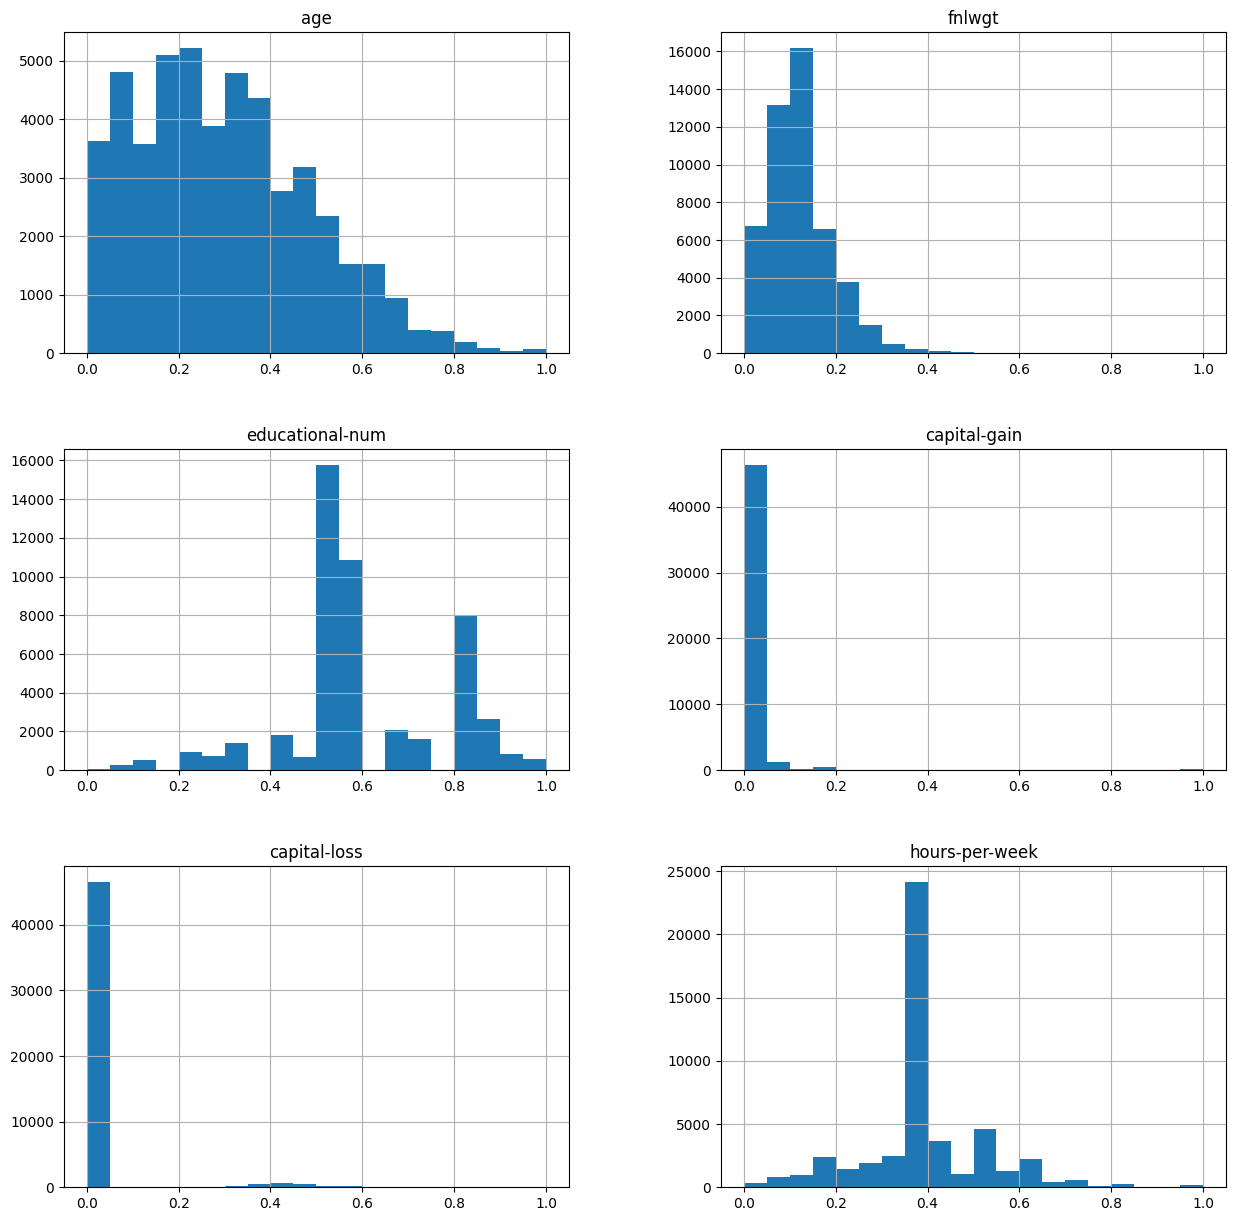

In [21]:
#Histogram for the normalized dataset

adf_normalized_1.hist(bins=20,figsize=(15,15))
plt.show()

In [7]:
numeric_features = adf_normalized_1.select_dtypes(include=[np.number])
numeric_features = numeric_features.columns
#Only filtering the numeric features
num_features = len(numeric_features)
cols = 3
rows = (num_features // cols) + (num_features % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    data = adf_normalized_1[feature].dropna()

    axes[i].hist(data, bins=30, density=True,
                 alpha=0.5, color='r', edgecolor='black')

    mu, sigma = data.mean(), data.std()

    x = np.linspace(data.min(), data.max(), 1000)
    pdf = sc.stats.norm.pdf(x, mu, sigma)

    axes[i].plot(x, pdf, 'k', linewidth=2)

    axes[i].set_title(f'Histogram of {feature} with Normal Curve')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Probability Density')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

NameError: name 'adf_normalized_1' is not defined

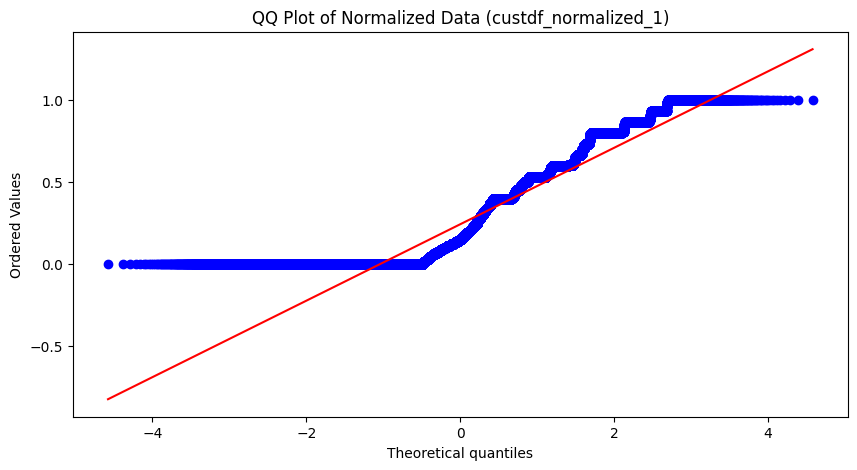

In [26]:
#QQ plot for the normalized dataset

import matplotlib.pyplot as plt
import scipy.stats as stats

adf_normalized_flat = adf_normalized_1.select_dtypes(include=[np.number])
adf_normalized_flat_num = adf_normalized_flat.to_numpy().flatten()

plt.figure(figsize=(10, 5))
stats.probplot(adf_normalized_flat_num, dist="norm", plot=plt)
plt.title('QQ Plot of Normalized Data (custdf_normalized_1)')
plt.show()

**The dataset's distribution is somewhat normal**, and is inferred from the QQ plot and histogram plot as well

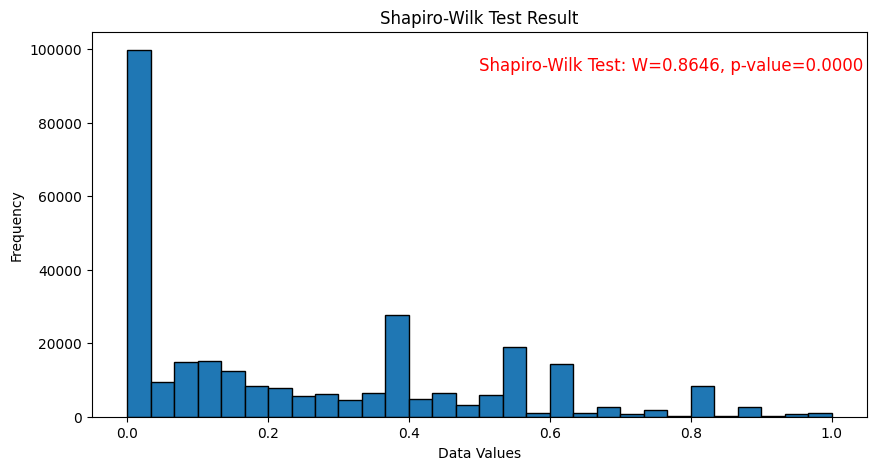

In [29]:
from scipy.stats import shapiro,kstest
from scipy.stats import shapiro

#sample Size <5000

# Perform Shapiro-Wilk test
shapiro_test = shapiro(adf_normalized_flat_num)


#if it is closer to 1 means Normal distribution



# Plot the histogram with annotation
plt.figure(figsize=(10, 5))
plt.hist(adf_normalized_flat_num, bins=30, edgecolor='black')
plt.title('Shapiro-Wilk Test Result')
plt.xlabel('Data Values')
plt.ylabel('Frequency')

p_value_text = f'Shapiro-Wilk Test: '
p_value_text += f'W={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}'
plt.annotate(p_value_text, xy=(0.5, 0.9),
             xycoords='axes fraction', fontsize=12, color='red')

plt.show();

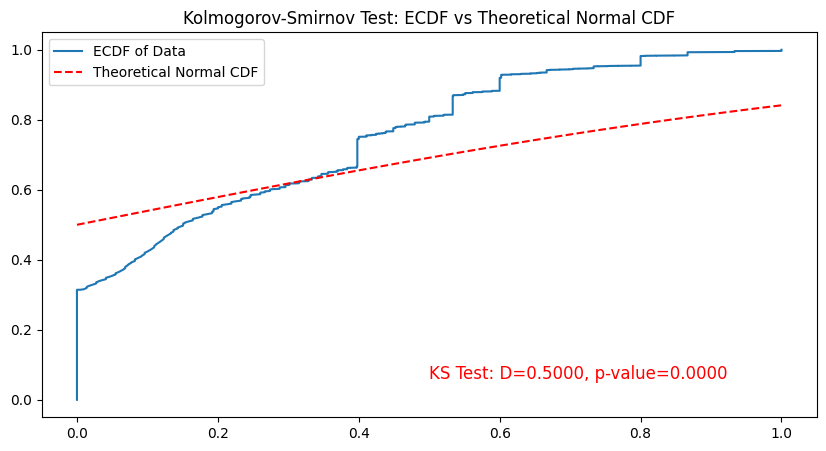

In [30]:
from scipy.stats import kstest, norm
from statsmodels.distributions.empirical_distribution import ECDF

# Perform Kolmogorov-Smirnov test
ks_test = kstest(adf_normalized_flat_num, 'norm')

# Generate theoretical normal distribution CDF
x = np.linspace(np.min(adf_normalized_flat_num),
                np.max(adf_normalized_flat_num), 100)

cdf_theoretical = norm.cdf(x)

ecdf = ECDF(adf_normalized_flat_num)
plt.figure(figsize=(10, 5))
plt.plot(ecdf.x, ecdf.y, label='ECDF of Data')
plt.plot(x, cdf_theoretical, label='Theoretical Normal CDF',
         linestyle='--', color='red')
plt.title('Kolmogorov-Smirnov Test: ECDF vs Theoretical Normal CDF')

ks_text = f'KS Test: D={ks_test[0]:.4f}, '
ks_text += f'p-value={ks_test[1]:.4f}'
plt.annotate(ks_text, xy=(0.5, 0.1),
             xycoords='axes fraction', fontsize=12, color='red')

plt.legend()
plt.show()

In Shapiro Wilk test, **the test statistic value W is nearly close to 1.** So, it is moderately and follows normal distribution in a even better fashion.

In KS test, **p-value is less than 0.05, and the data doesn't follow normal distribution**, and needs to be transformed.

In [1]:
#Applying transformations

# Apply Logarithmic transformation (only for strictly positive data)
adf_log = np.log1p(adf_normalized_flat_num)

# Box-Cox transformation (must ensure all data is positive)
adf_bc, _ = stats.boxcox(adf_normalized_flat_num + 1e-6)
# Adding a small constant to handle non-positive values

NameError: name 'np' is not defined

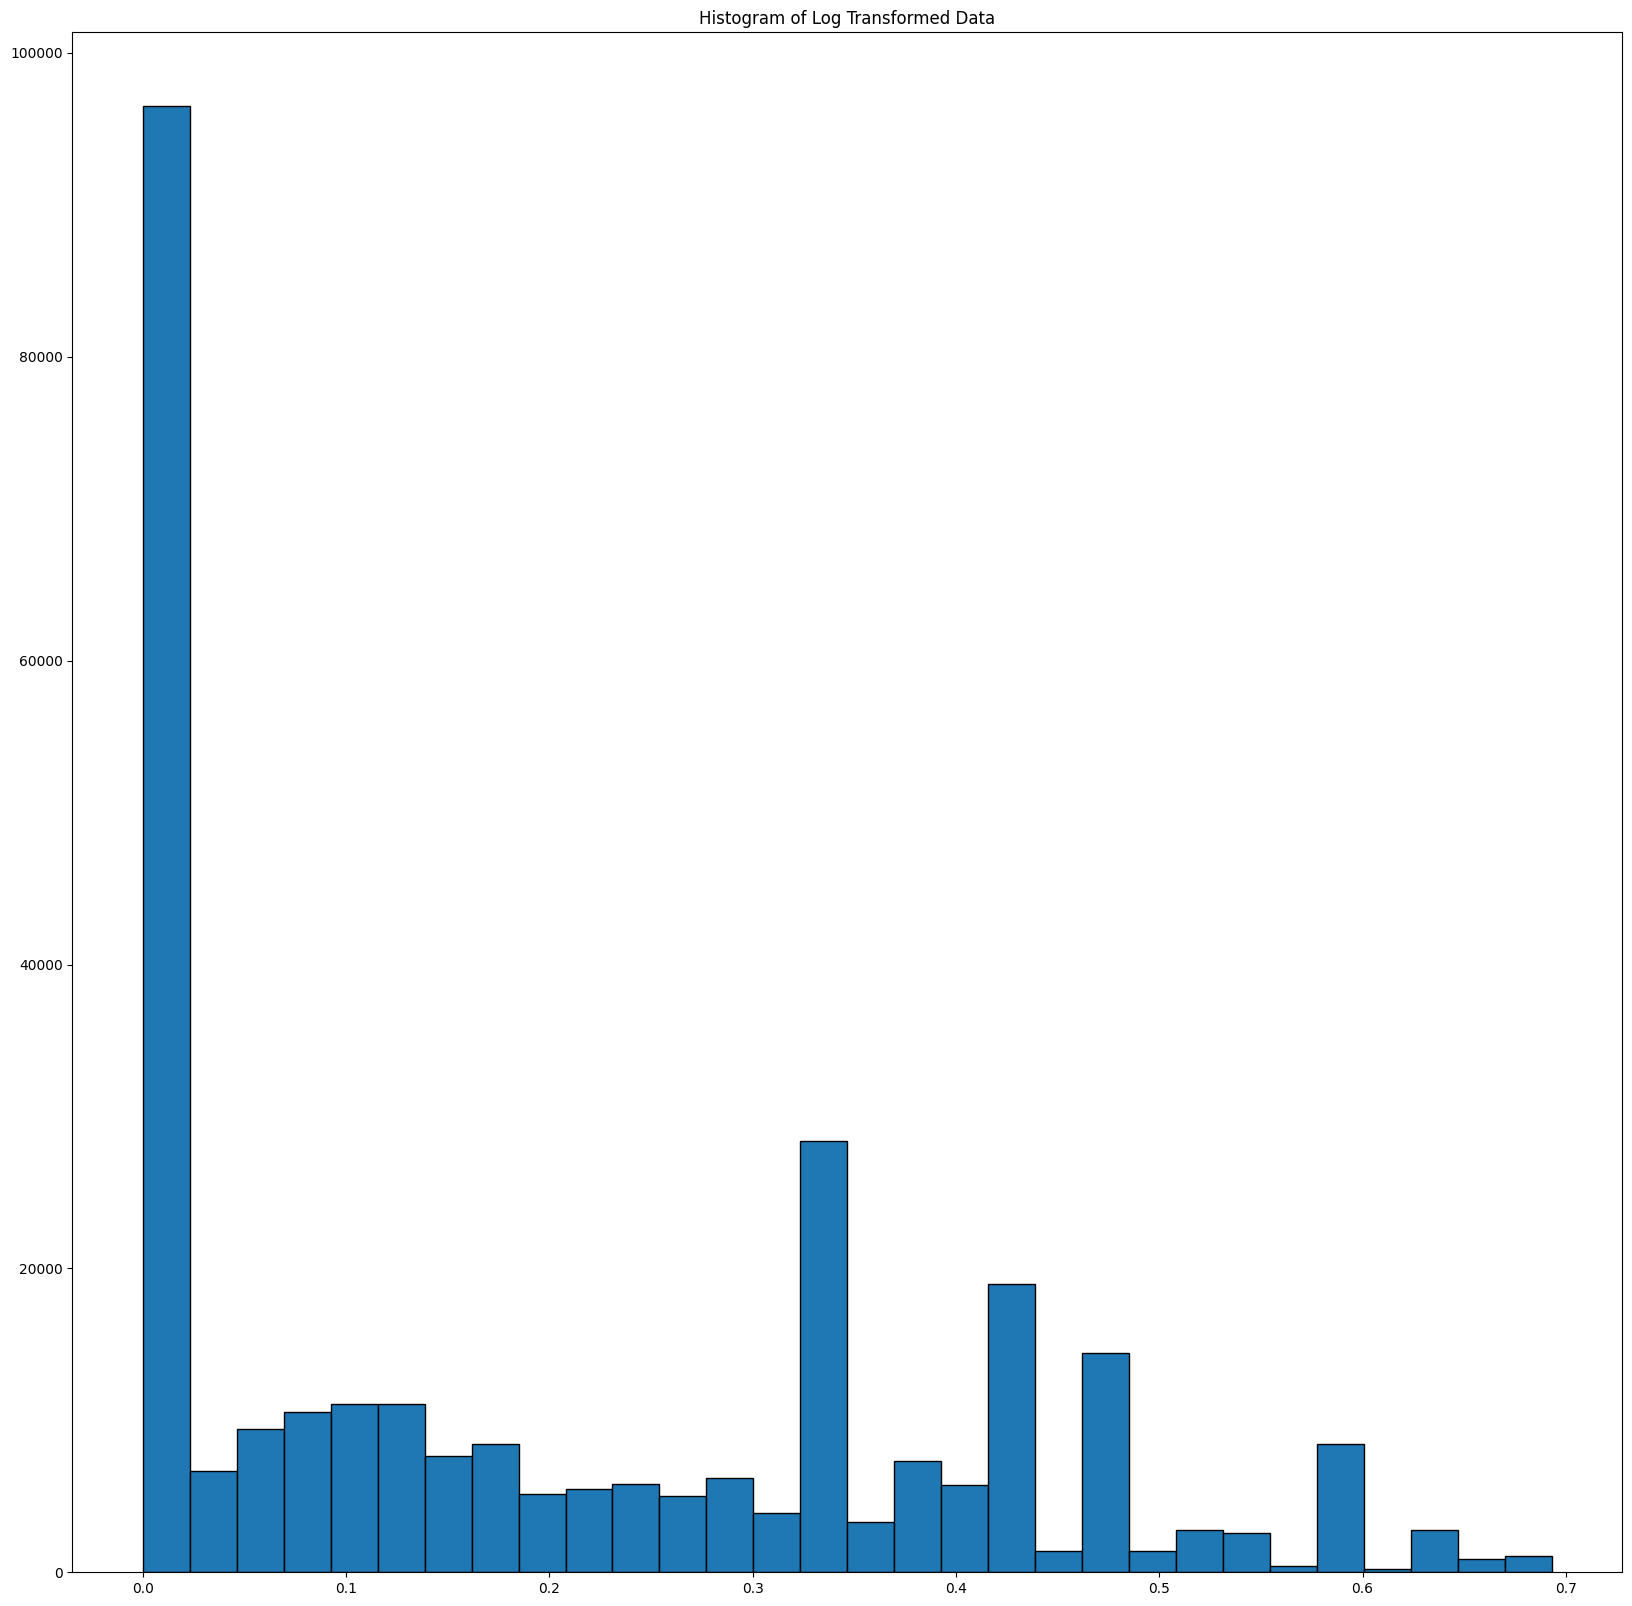

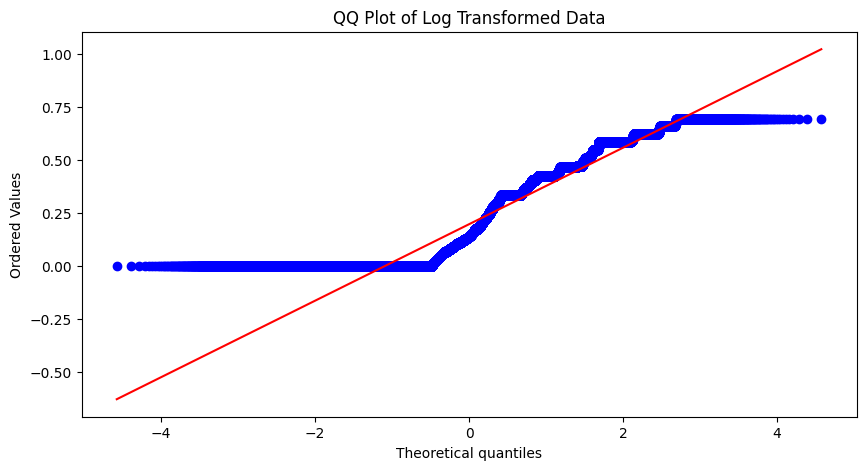


Shapiro-Wilk Test after Log Transformation:
W=0.8742216050959503, p-value=1.6400033295497044e-141

Kolmogorov-Smirnov Test after Log Transformation:
KS Statistic=0.5, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 293052.
  res = hypotest_fun_out(*samples, **kwds)


In [37]:
#Reassessment after applying transformations

# Histogram and QQ plot for log-transformed data
plt.figure(figsize=(20, 20))
plt.hist(adf_log, bins=30, edgecolor='black')
plt.title('Histogram of Log Transformed Data')
plt.show();
print()

adf_log_flatten = adf_log.flatten()
plt.figure(figsize=(10,5))
stats.probplot(adf_log_flatten, dist="norm", plot=plt)
plt.title('QQ Plot of Log Transformed Data')
plt.show();
print()

# Shapiro-Wilk test for log-transformed data
shapiro_log_test = shapiro(adf_log)
print(f'Shapiro-Wilk Test after Log Transformation:')
print(f'W={shapiro_log_test[0]}, p-value={shapiro_log_test[1]}')
print()

# Kolmogorov-Smirnov test for log-transformed data
ks_log_test = kstest(adf_log, 'norm')
print(f'Kolmogorov-Smirnov Test after Log Transformation:')
print(f'KS Statistic={ks_log_test[0]}, p-value={ks_log_test[1]}')

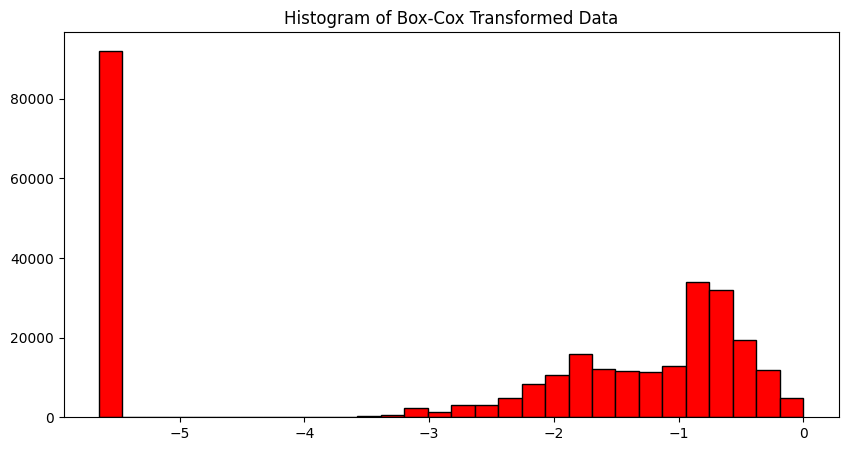

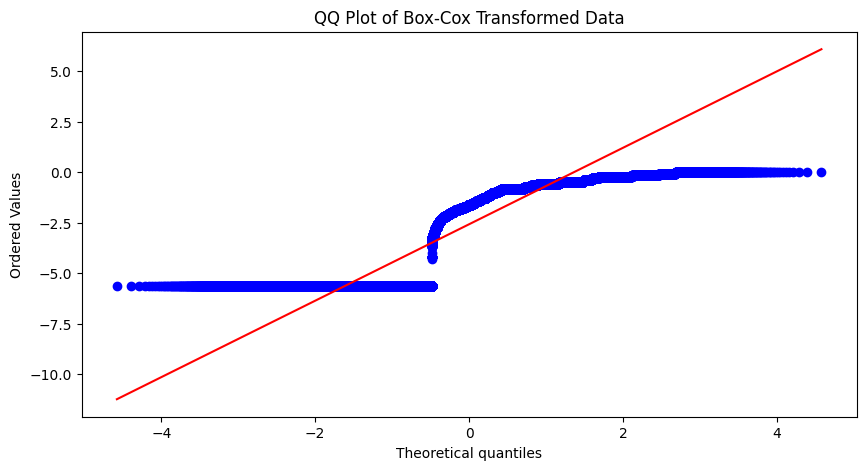


Shapiro-Wilk Test after Box-Cox Transformation:
W=0.7675117401008009, p-value=2.607371179706071e-161

Kolmogorov-Smirnov Test after Box-Cox Transformation:
KS Statistic=0.615408057515238, p-value=0.0


In [38]:
#Reassessment after applying transformations

# Histogram and QQ plot for box cox-transformed data
plt.figure(figsize=(10, 5))
plt.hist(adf_bc, bins=30, color='red',edgecolor='black')
plt.title('Histogram of Box-Cox Transformed Data')
plt.show()
print()

adf_bc_flatten = adf_bc.flatten()
plt.figure(figsize=(10,5))
stats.probplot(adf_bc_flatten, dist="norm", plot=plt)
plt.title('QQ Plot of Box-Cox Transformed Data')
plt.show()
print()

# Shapiro-Wilk test for box cox-transformed data
shapiro_log_test = shapiro(adf_bc)
print(f'Shapiro-Wilk Test after Box-Cox Transformation:')
print(f'W={shapiro_log_test[0]}, p-value={shapiro_log_test[1]}')
print()

# Kolmogorov-Smirnov test for box cox-transformed data
ks_log_test = kstest(adf_bc, 'norm')
print(f'Kolmogorov-Smirnov Test after Box-Cox Transformation:')
print(f'KS Statistic={ks_log_test[0]}, p-value={ks_log_test[1]}')

In [40]:
#Inference:

'''Firstly, from the tests, initially, it is
observed that the dataset was only slightly unnormalized''';

'''Secondly, after the transformations were applied, it is
observed that the dataset was not normalized, and from the tests and
the test statistic values W and p-values, it is clear that,
there was no change in the distribution of data in the dataset''';

'''Also, Shapiro Wilk test fails for large sample datasets. So both
the tests were a failure for this dataset. It was clear from the
QQ plot after the tests and transformations performed also.''';